# Notebook: segmenting nuclei with the cellpose napari plugin

Overview: Segment nuclei using cellpose napari plugin

Data source:  [OpticalPooledScreens github repository](https://github.com/feldman4/OpticalPooledScreens).

In [1]:
from skimage import io 

url = 'https://raw.githubusercontent.com/kevinyamauchi/napari-spot-detection-tutorial/main/data/nuclei_cropped.tif'
nuclei = io.imread(url)

In [2]:
import napari

viewer = napari.view_image(nuclei, colormap='magma')

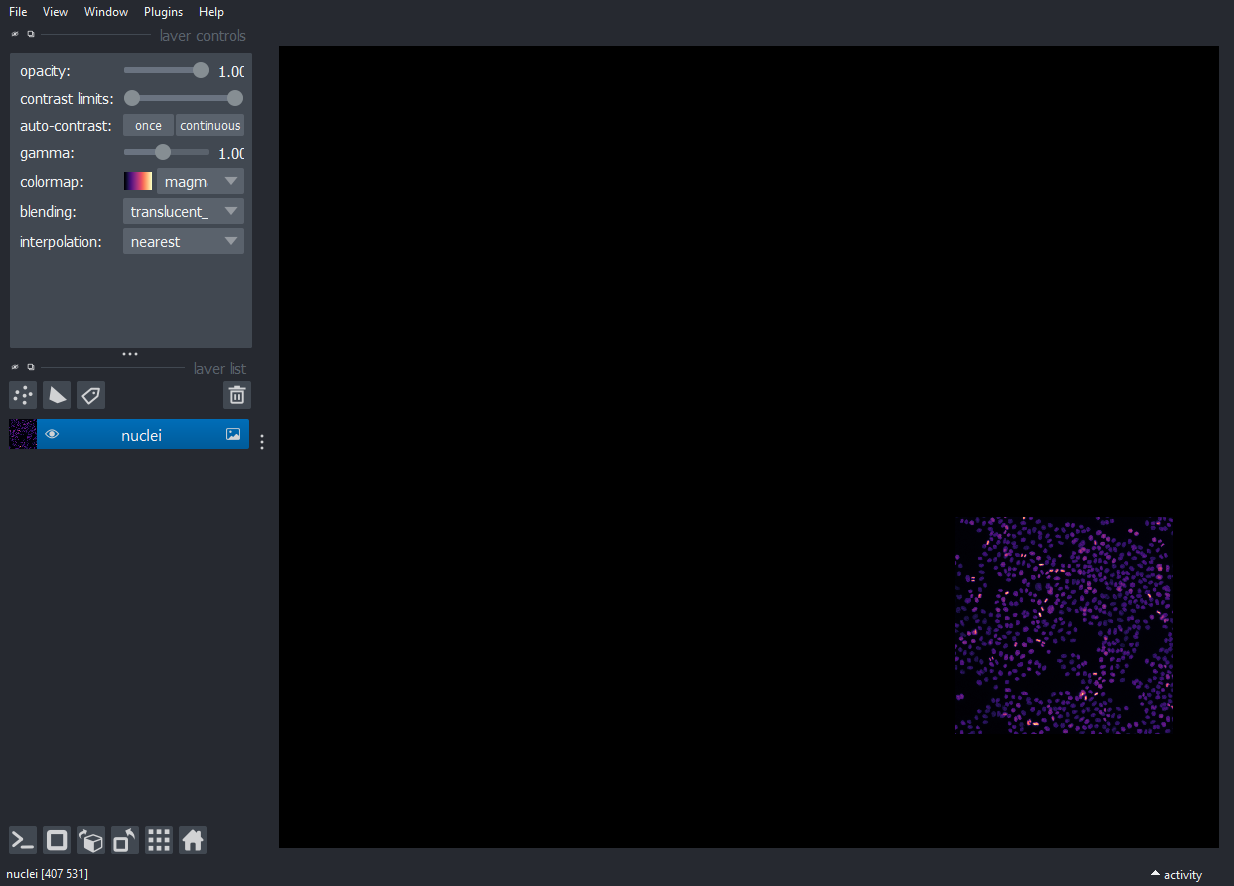

In [3]:
from napari.utils import nbscreenshot

nbscreenshot(viewer)

## Segmenting nuclei

Use the [cellpose napari plugin](https://github.com/MouseLand/cellpose-napari). 

1. Start Cellpose plugin. Fom menu bar, click:

   Plugins > cellpose-napari:cellpose

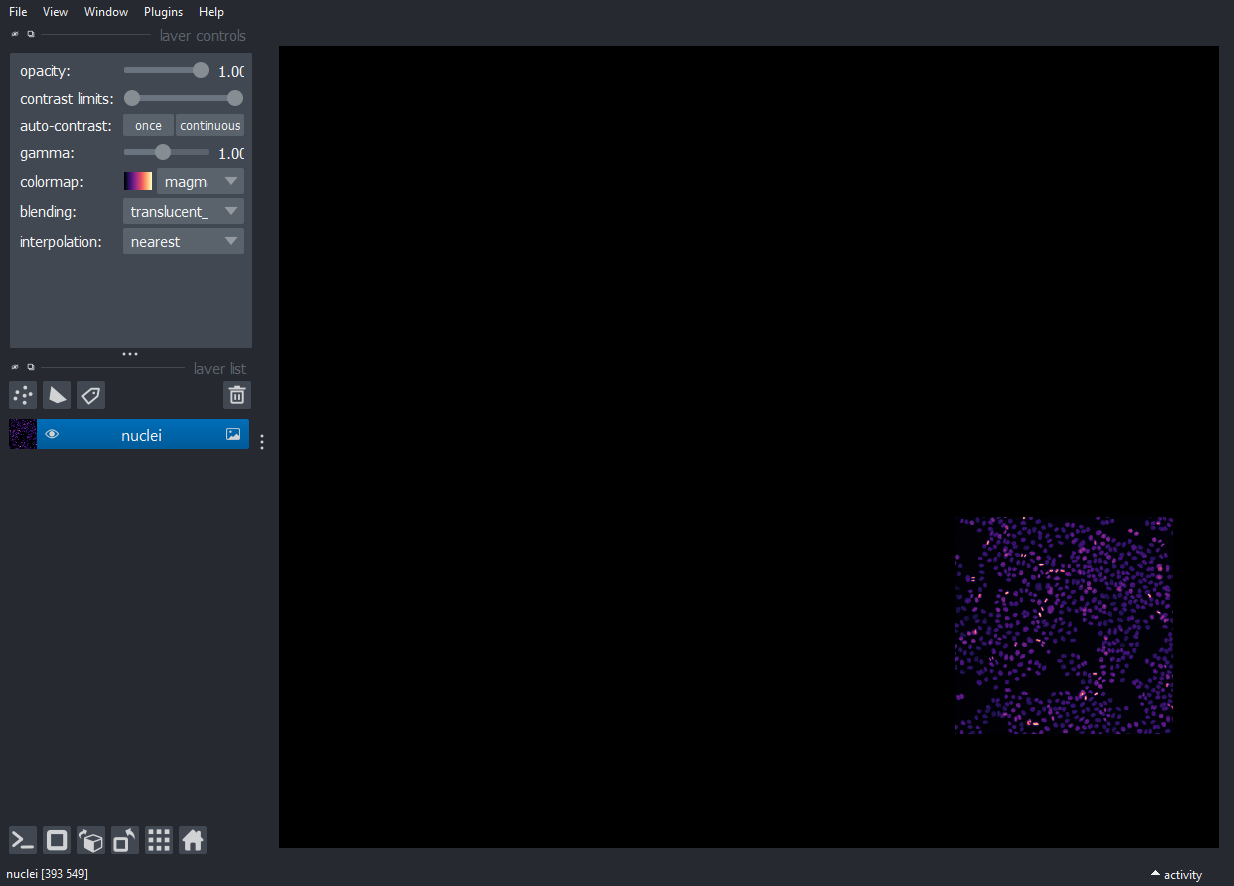

c:\Users\Jaz\src\anaconda\envs\env_tutorial\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 25.3M/25.3M [00:14<00:00, 1.87MB/s]


In [4]:
nbscreenshot(viewer)

2. Select the "nuclei" image layer

3. Select model type: "nuclei"

4. Need to provide estimate of nuclei size to scale data

    Do this using Shapes layer: outline nuclei, cellpose will use those annotations to estimate size of nuclei

    a. Click "add Shapes" layer button, will create + select new layer "Shapes"

    b. Use elipse to draw shape over nuclei

    c. Modify with arrow tool

    d. To complete: Click "compute diameter from shape layer" button. Diameter value will populate. 

    e. For demo: de-select "average 4 nets" for potentially less accurate, but faster segmentation

    f. run segmentation
    
    g. segmentation complete: new layers added to list 

## Quantify nuclei shape

Using scikit-image and matplotlib to compute and display basic properties of segmented cells

## Measure area and perimeter

- cellpose outputs segmentation masks as a layer
- we can access this layer by name
- use scikit-image regionprops_table function to measure the area and perimeter of detected nuclei.
- regionprops_table outputs a dictionary where each key is a name of a measurement (eg. area)


In [5]:
from skimage.measure import regionprops_table

# measure the area and perimeter for each nucleus

label_layer = viewer.layers['nuclei_cp_masks_000']

rp_table = regionprops_table(
    label_layer.data,
    properties = ('area', 'perimeter')
)


In [6]:
rp_table

{'area': array([120,  38,  16,  39,  69,  65,  83,  61, 102,  78,  80, 105, 125,
        114,  93, 123, 115,  98, 110,  99, 115, 106, 100, 129, 104, 121,
        108, 113,  91, 117, 125, 106, 102, 119, 120, 106, 101, 103, 126,
        133, 106,  98, 115, 114, 101, 127, 105, 101,  72, 146, 116, 109,
        108,  24, 111, 100, 111, 116,  79, 134, 114, 120, 122, 108, 103,
        136, 117,  95, 122, 125, 195, 103, 101, 101, 103,  81,  97, 123,
         99, 103,  75, 128, 120, 105, 115, 125, 120, 115, 103,  67, 106,
        110, 102, 104,  87, 104, 120,  92, 120, 106, 143, 156, 105, 120,
        102,  95,  99, 105, 105, 119, 121, 107,  88,  95, 117,  93,  92,
        135, 108, 120, 112,  88,  68, 100, 109,  99, 123, 109,  45,  80,
         83,  46, 102, 109, 105, 130, 109, 106, 131, 123, 125, 105, 111,
        119, 108, 117, 101, 105, 107, 110, 100, 106, 106, 110, 117, 110,
        108, 114,  93,  92,  44, 102, 144, 103, 106, 140, 115,  79,  98,
        103, 104, 116, 120,  89, 123,  93, 

## Plotting results

Plot a histogram of nuclei area

median area: 106.0 px


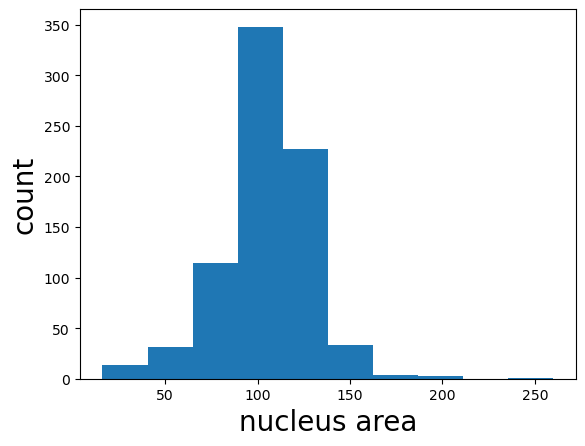

In [9]:
from matplotlib import pyplot as plt
import numpy as np

# print median area
median_area = np.median(rp_table['area'])
print(f'median area: {median_area} px')


# plot a histogram of the area

plt.hist(rp_table['area']);
plt.xlabel('nucleus area', fontsize = 20)
plt.ylabel('count', fontsize = 20)
plt.show()

Calcuate circularity 
$$f_{circ} = \frac{4 \pi A}{P^2}$$

where A is the area and P is the perimeter of the object. We plot the circularity vs. the area and see that the circularity of the nuclei does not appear to depend on the area.


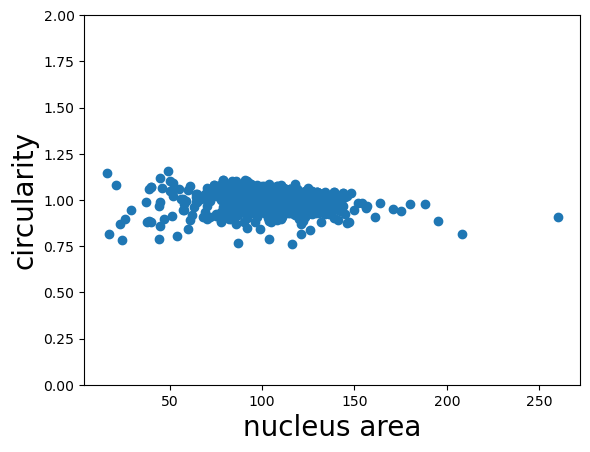

In [10]:
circularity = (4 * np.pi * rp_table['area']) / np.square(rp_table['perimeter'])

plt.scatter(rp_table['area'], circularity);
plt.xlabel('nucleus area', fontsize=20);
plt.ylabel('circularity', fontsize=20);
plt.ylim((0, 2))
plt.show()

Conclusions

Used cellpose-napari plugin to perform nucleus segmentation, then used this data to calculate the relationship of nucleus area v circularity. 